**IMPORTING LIBRARIES**

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.base import BaseEstimator, TransformerMixin

**LOADING DATA AND EXPLORING**

In [2]:
tf=pd.read_csv("Titanic-Dataset.csv")
tf.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
tf.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
tf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
tf.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
print(tf.info())
print("\nMissing values:\n", tf.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked    

In [10]:
# Explore the target variable
print("\nSurvival rate:", tf['Survived'].mean())


Survival rate: 0.3838383838383838


In [15]:
# Explore categorical variables
for col in ['Pclass', 'Sex', 'Embarked']:
    (f"\n{col} value counts:\n", tf[col].value_counts(normalize=True))
    print(tf)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [16]:
# Explore numerical variables
tf[['Age', 'Fare']].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


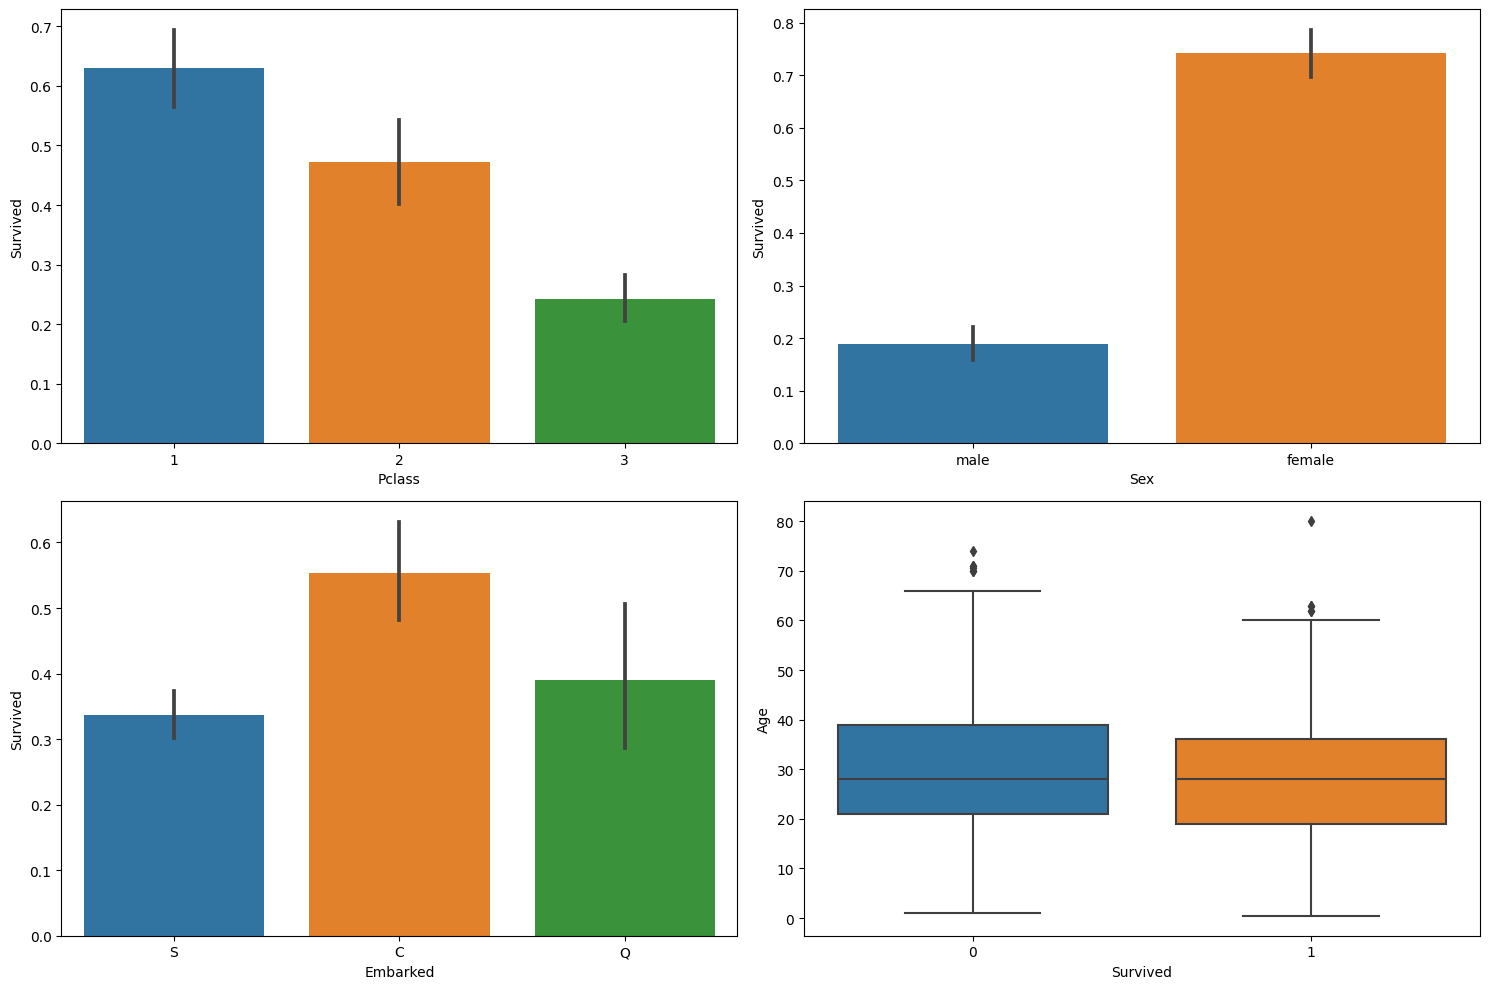

In [18]:
# Visualize the relationship between features and survival
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.barplot(x='Pclass', y='Survived', data=tf, ax=axes[0, 0])
sns.barplot(x='Sex', y='Survived', data=tf, ax=axes[0, 1])
sns.barplot(x='Embarked', y='Survived', data=tf, ax=axes[1, 0])
sns.boxplot(x='Survived', y='Age', data=tf, ax=axes[1, 1])
plt.tight_layout()
plt.show()


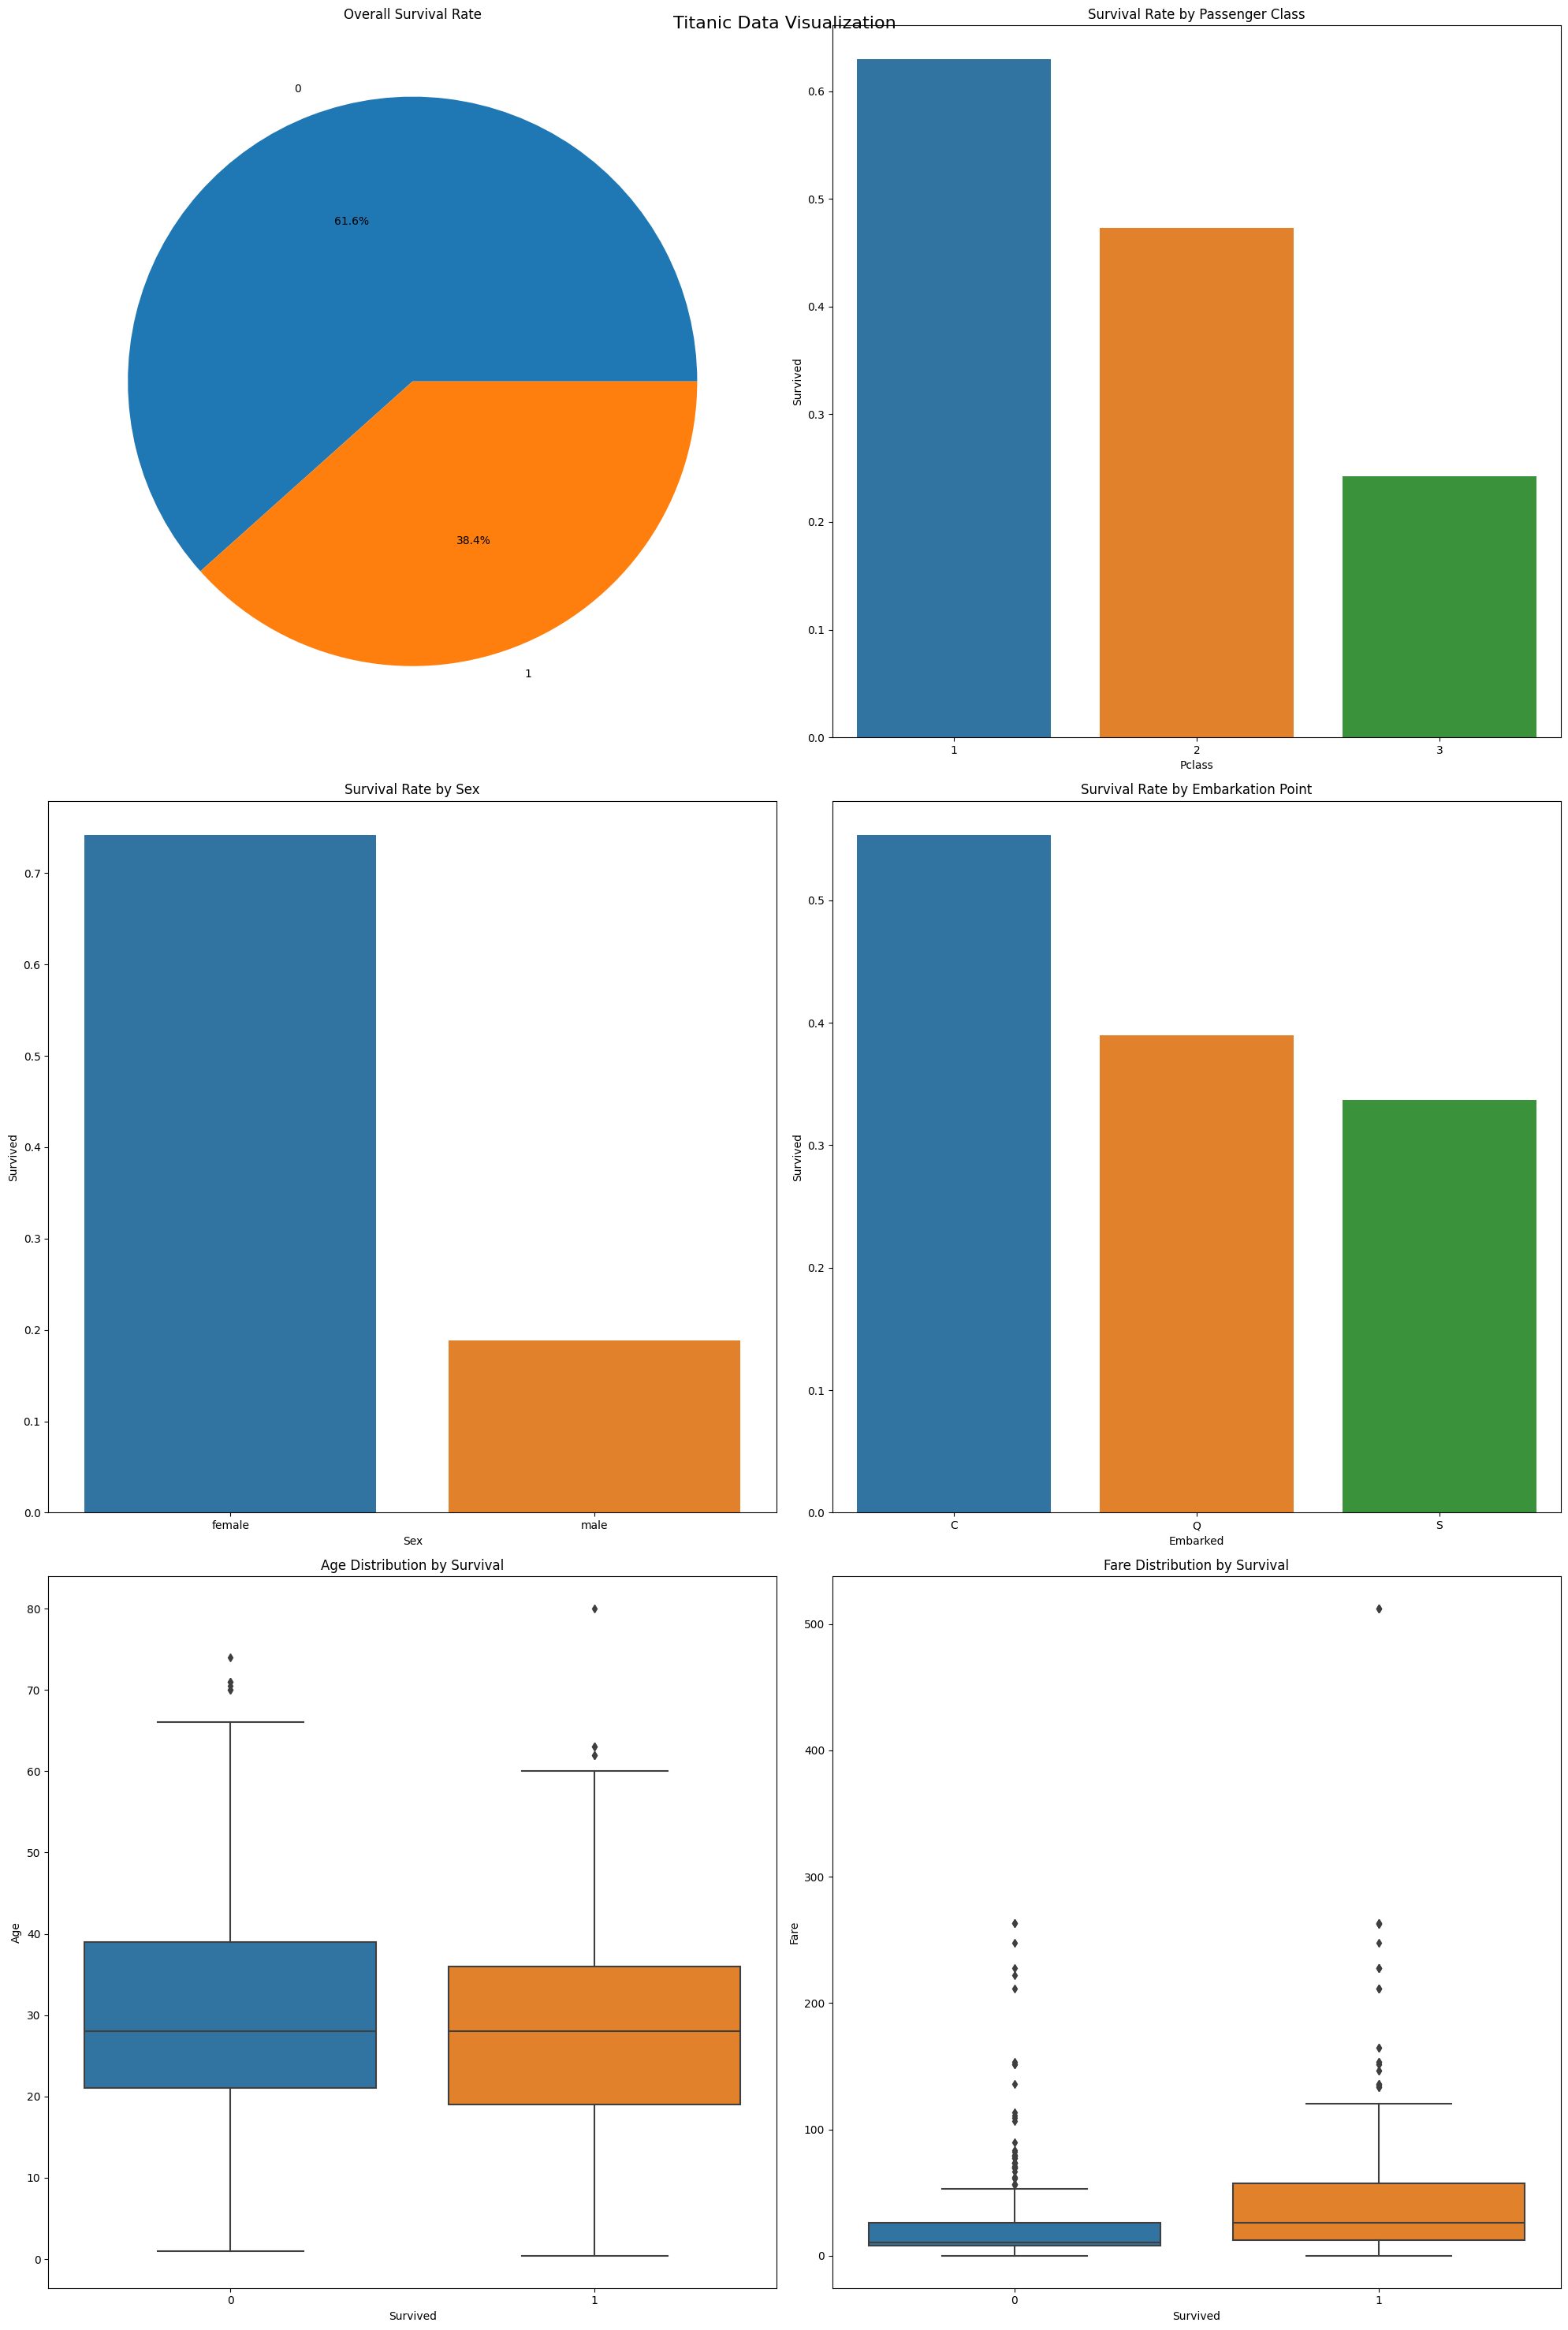

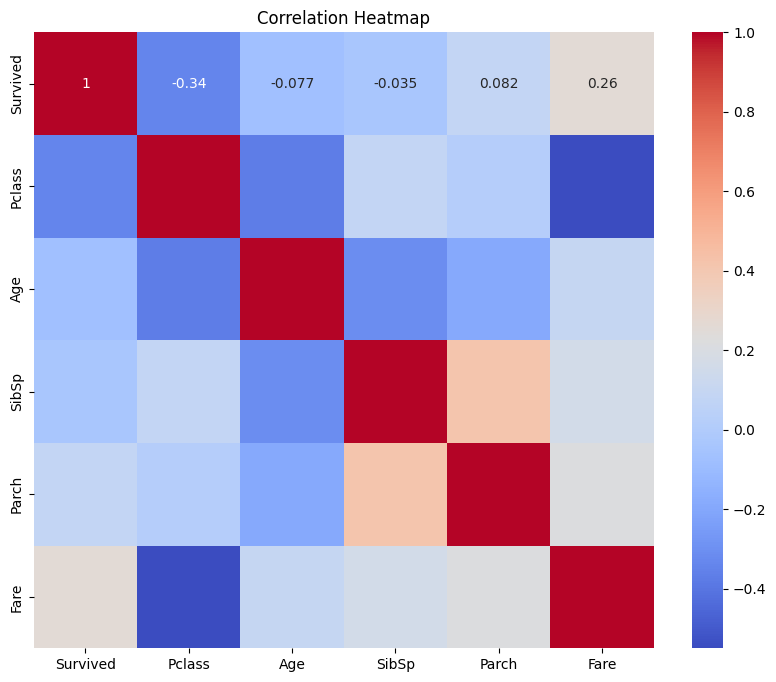


Survival rate: 0.3838383838383838

Categorical Variables Summary:

Pclass value counts:
 Pclass
3    0.551066
1    0.242424
2    0.206510
Name: proportion, dtype: float64

Sex value counts:
 Sex
male      0.647587
female    0.352413
Name: proportion, dtype: float64

Embarked value counts:
 Embarked
S    0.724409
C    0.188976
Q    0.086614
Name: proportion, dtype: float64

Numerical Variables Summary:
              Age        Fare
count  714.000000  891.000000
mean    29.699118   32.204208
std     14.526497   49.693429
min      0.420000    0.000000
25%     20.125000    7.910400
50%     28.000000   14.454200
75%     38.000000   31.000000
max     80.000000  512.329200


In [27]:
# Function to create a bar plot
def create_bar_plot(df, x, y, title, ax):
    sns.barplot(x=x, y=y, data=df, ax=ax)
    ax.set_title(title)
    ax.set_xlabel(x)
    ax.set_ylabel(y)

# Function to create a box plot
def create_box_plot(df, x, y, title, ax):
    sns.boxplot(x=x, y=y, data=df, ax=ax)
    ax.set_title(title)
    ax.set_xlabel(x)
    ax.set_ylabel(y)

# Create a figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(20, 30))
fig.suptitle('Titanic Data Visualization', fontsize=16)

# Overall Survival Rate
survival_rate = tf['Survived'].value_counts(normalize=True)
axes[0, 0].pie(survival_rate.values, labels=survival_rate.index, autopct='%1.1f%%')
axes[0, 0].set_title('Overall Survival Rate')

# Survival Rate by Passenger Class
create_bar_plot(tf.groupby('Pclass')['Survived'].mean().reset_index(), 
                'Pclass', 'Survived', 'Survival Rate by Passenger Class', axes[0, 1])

# Survival Rate by Sex
create_bar_plot(tf.groupby('Sex')['Survived'].mean().reset_index(), 
                'Sex', 'Survived', 'Survival Rate by Sex', axes[1, 0])

# Survival Rate by Embarked
create_bar_plot(tf.groupby('Embarked')['Survived'].mean().reset_index(), 
                'Embarked', 'Survived', 'Survival Rate by Embarkation Point', axes[1, 1])

# Age Distribution by Survival
create_box_plot(tf, 'Survived', 'Age', 'Age Distribution by Survival', axes[2, 0])

# Fare Distribution by Survival
create_box_plot(tf, 'Survived', 'Fare', 'Fare Distribution by Survival', axes[2, 1])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Create a correlation heatmap
plt.figure(figsize=(10, 8))
corr_matrix = tf[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Print additional information
print("\nSurvival rate:", tf['Survived'].mean())

print("\nCategorical Variables Summary:")
for col in ['Pclass', 'Sex', 'Embarked']:
    print(f"\n{col} value counts:\n", tf[col].value_counts(normalize=True))

print("\nNumerical Variables Summary:")
print(tf[['Age', 'Fare']].describe())

Processed data shape: (891, 16)
Number of features after preprocessing: 16

First few feature names:
['Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

Logistic Regression:
Accuracy: 0.7933
Cross-validation scores: [0.78212291 0.81460674 0.80898876 0.76966292 0.83146067]
Mean CV score: 0.8014

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       105
           1       0.77      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179


Random Forest:
Accuracy: 0.8101
Cross-validation scores: [0.81564246 0.79213483 0.83707865 0.7752809  0.80898876]
Mean CV score: 0.8058

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       105
           1   

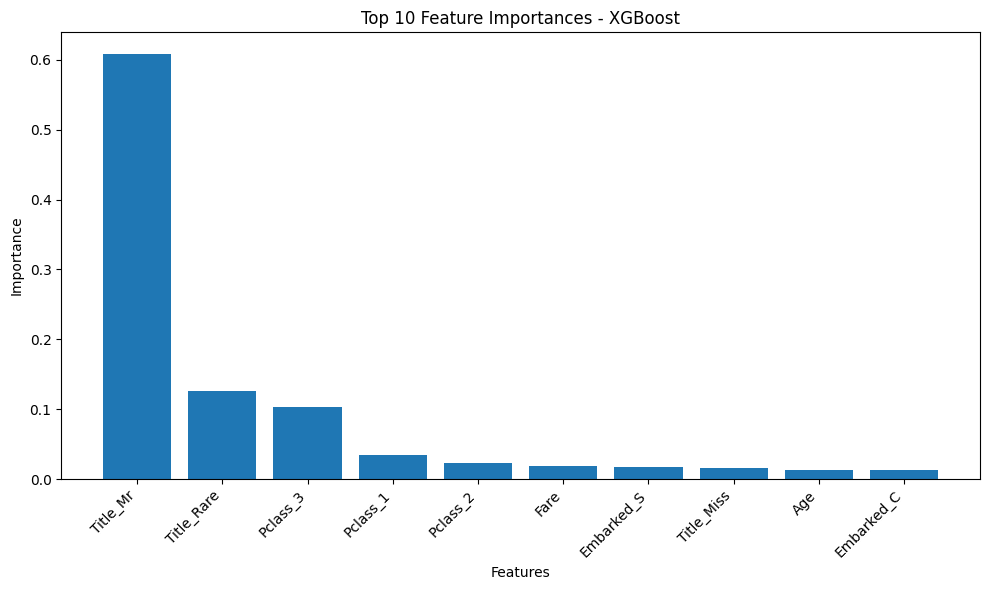

In [34]:
# Custom transformer for feature engineering
class FeatureEngineer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_ = X.copy()
        # Create 'FamilySize' feature
        X_['FamilySize'] = X_['SibSp'] + X_['Parch'] + 1
        # Create 'IsAlone' feature
        X_['IsAlone'] = (X_['FamilySize'] == 1).astype(int)
        # Extract title from Name
        X_['Title'] = X_['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
        # Group rare titles
        rare_titles = ['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
        X_['Title'] = X_['Title'].replace(rare_titles, 'Rare')
        X_['Title'] = X_['Title'].replace(['Mlle', 'Ms'], 'Miss')
        X_['Title'] = X_['Title'].replace('Mme', 'Mrs')
        return X_

# Load the data
tf = pd.read_csv("Titanic-Dataset.csv")

# Separate features and target
X = tf.drop('Survived', axis=1)
y = tf['Survived']

# Define feature groups
numeric_features = ['Age', 'Fare']
categorical_features = ['Pclass', 'Sex', 'Embarked', 'Title']

# Create preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the full pipeline
full_pipeline = Pipeline(steps=[
    ('feature_engineer', FeatureEngineer()),
    ('preprocessor', preprocessor)
])

# Fit and transform the data
X_processed = full_pipeline.fit_transform(X)

# Get feature names after preprocessing
onehot_encoder = full_pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
cat_feature_names = onehot_encoder.get_feature_names_out(categorical_features)
feature_names = numeric_features + list(cat_feature_names)

print("Processed data shape:", X_processed.shape)
print("Number of features after preprocessing:", len(feature_names))
print("\nFirst few feature names:")
print(feature_names[:10])
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42)
}

# Train and evaluate models
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_processed, y, cv=5)
    
    print(f"\n{name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean CV score: {cv_scores.mean():.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Select the best model (you can modify this based on the results)
best_model = max(models, key=lambda x: cross_val_score(models[x], X_processed, y, cv=5).mean())
print(f"\nBest model: {best_model}")

# Train the best model on the entire dataset
final_model = models[best_model]
final_model.fit(X_processed, y)

# Save the model (optional)
import joblib
joblib.dump(final_model, 'titanic_model.joblib')
joblib.dump(full_pipeline, 'titanic_pipeline.joblib')

print("\nModel and preprocessing pipeline saved.")

# Convert to DataFrame for easier viewing
X_processed_df = pd.DataFrame(X_processed, columns=feature_names)
print("\nFirst few rows of processed data:")
print(X_processed_df.head())

# Optional: Display feature importances for Random Forest or XGBoost
if best_model in ['Random Forest', 'XGBoost']:
    importances = final_model.feature_importances_
    feature_imp = pd.DataFrame({'feature': feature_names, 'importance': importances})
    feature_imp = feature_imp.sort_values('importance', ascending=False)
    print("\nTop 10 most important features:")
    print(feature_imp.head(10))

# Optional: Plot feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(feature_imp['feature'][:10], feature_imp['importance'][:10])
plt.title(f'Top 10 Feature Importances - {best_model}')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()